In [18]:
# #pip install
# %pip install scikit-learn
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib
# %pip install imblearn

In [19]:
#imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.metrics import accuracy_score



In [34]:
#treinamentos
def knnFit(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=5_000)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia KNN:", acuracia,'%')
    return model
def gaussian(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    model = gnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia gaussian:", acuracia,'%')
    return model
def bernoullin(X_train, y_train, X_test, y_test):
    bnb = BernoulliNB()
    model = bnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia Bernoulli:", acuracia,'%')
    return model
def redeNeural(X_train, y_train, X_test, y_test):
    
    np.random.seed(1)
    tf.random.set_seed(1)
    model = keras.Sequential([
        layers.Dense(10, activation='tanh', input_shape=(X_train.shape[1],)),  # Corrigido para usar input_shape
        layers.Dense(5, activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.summary()
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_split = 0.2,
        batch_size=10,
        verbose=1
        )
    #acc
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()
    #loss
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    y_pred = model.predict(X_test).reshape(-1)
    accuracy = accuracy_score(np.round(y_pred), y_test)
    print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
    return model


In [21]:
#utils
import warnings
warnings.filterwarnings("ignore")
def shuffle(X, y):
    return train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)

def eliminacaoSequencial(X_train, y_train, X_test, y_test):
    # Converte indices para um array booleano compatível com numpy
    indices = np.ones(len(X_train), dtype=bool)
    
    for i in range(len(X_train)):
        # Temporariamente desativa o índice `i`
        indices[i] = False
        
        # Treina o modelo sem o ponto `i`
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(X_train[indices], y_train[indices])
        
        # Verifica se o ponto removido ainda é classificado corretamente
        pred = model.predict([X_train.iloc[i].values])
        if pred != y_train.iloc[i]:
            # Mantém o ponto se não for corretamente classificado
            indices[i] = True

    print("Quantas amostras de treino sobraram:", np.sum(indices))

    # Re-treina o modelo com o conjunto de dados reduzido
    model = KNeighborsClassifier(n_neighbors=100)
    model.fit(X_train[indices], y_train[indices])

    # Faz a predição e avalia o desempenho
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("Acurácia final:", accuracy)

def insercaoSequencial(X_train, y_train, X_test, y_test):
    indices = []
    for _ in range(len(X_train)):
        indices.append(False)

    # inclui a primeira amostra ja que o modelo nunca vai acertar
    indices[0] = True

    # faz a logica de tentar inserir cada registro e ver se está correto
    for i in range(1,len(X_train)):
        model = KNeighborsClassifier(n_neighbors = 100)
        model.fit(X_train[indices], y_train[indices])

    pred = model.predict([X_train.values[i]])
    if pred != y_train.values[i]:
        indices[i] = True

    print("Quantas amostras de treino sobraram:", len(X_train[indices]))

    # calcula o resultado final depois das insercoes

    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train[indices], y_train[indices])
    pred = model.predict(X_test)

    print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)


# Classificação se a pessoa bebe ou nao




In [22]:
def loadDataset()-> DataFrame:
    return pd.read_csv('dataset/bebe.csv')

dt = loadDataset()
dt.drop(columns=['SMK_stat_type_cd'])
# print(dt.columns)
print(Counter(dt.DRK_YN	))
print('esta balanceado')


print('dataset antes -> registros', len(dt))

# dt = loadDataset()
# display(dt.describe())
# display(dt.columns)
# display(dt['isDead'].describe())
# print('contagem de valores nulos',dt.isnull().sum())
# print(Counter(dt['isDead']),'\n podemos notar que não está desbalanceado o valor entre as classes, sendo que temos 4926 dados em que o player morreu e 14954 em que o player ficou vivo')


Counter({'N': 495858, 'Y': 495488})
esta balanceado
dataset antes -> registros 991346


In [23]:
# print('preciso rebalancear')
# dtX = dt
# dtY = dt['DRK_YN']
# ros = over_sampling.RandomOverSampler(sampling_strategy='auto', random_state=42)
# print(dt.duplicated().sum())
# X_res, y_res = ros.fit_resample(dtX, dtY)
# y_res = pd.DataFrame(y_res, columns=["DRK_YN"])
# X_res = pd.DataFrame(X_res, columns=dt.columns[:-1])


# print('novo conjunto apos oversampler',Counter(y_res['DRK_YN']))

# dt2 = pd.concat([X_res.reset_index(drop=True), y_res.reset_index(drop=True)], axis=1)

# print(dt2.head(5))
# dup = dt2.duplicated()
# print(dup.sum())
# print(len(dup[dup == True]))


In [24]:
isNullDt = dt.isnull()
isNullDt.sum()
#nao tem null

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Counter({'Male': 526415, 'Female': 464931})

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,0


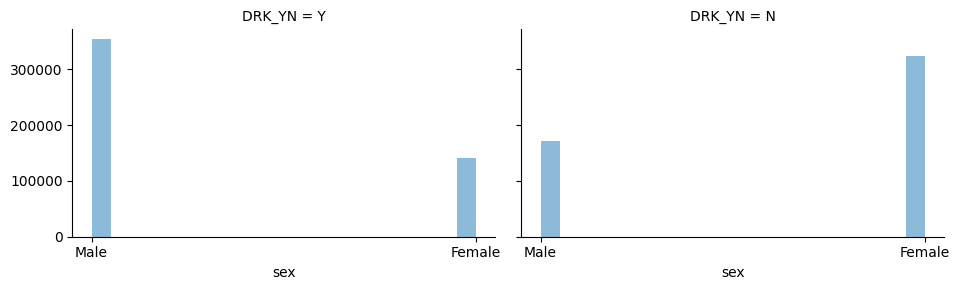

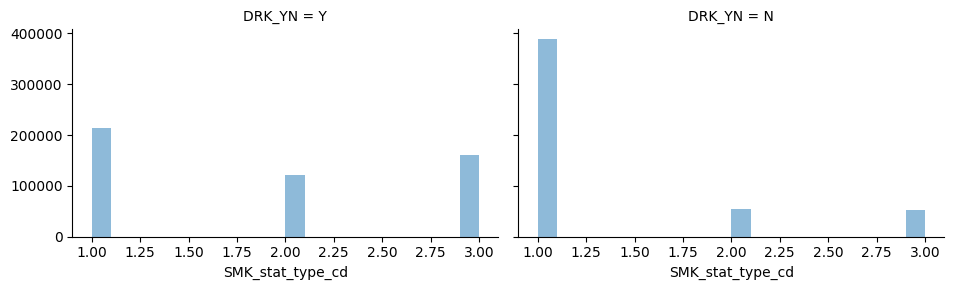

In [25]:

grid = sns.FacetGrid(dt, col='DRK_YN', aspect=1.6)
grid.map(plt.hist, 'sex', alpha=.5, bins=20)
grid.add_legend()


grid2 = sns.FacetGrid(dt, col='DRK_YN', aspect=1.6)
grid2.map(plt.hist, 'SMK_stat_type_cd', alpha=.5, bins=20)
grid2.add_legend()
#em vez de one-hot-encoded vamos passar 1 para homem e 0 para mulher sabendo que os homens sao mais propicios a beber...como mostrado no dataset
dt2 = dt.copy()
display(Counter(dt2.sex))
dt2['sex'] = dt2['sex'].map({
    'Male': 1,
    'Female' : 0
})

dt2['DRK_YN'] = dt2['DRK_YN'].map({
    'Y':1,
    'N':0
})#so para conseguir ver a correlacao


dt2['SMK_stat_type_cd'] = dt2['SMK_stat_type_cd'].map({
    1:0,
    2:0,
    3:1
})
dt2.head(4)

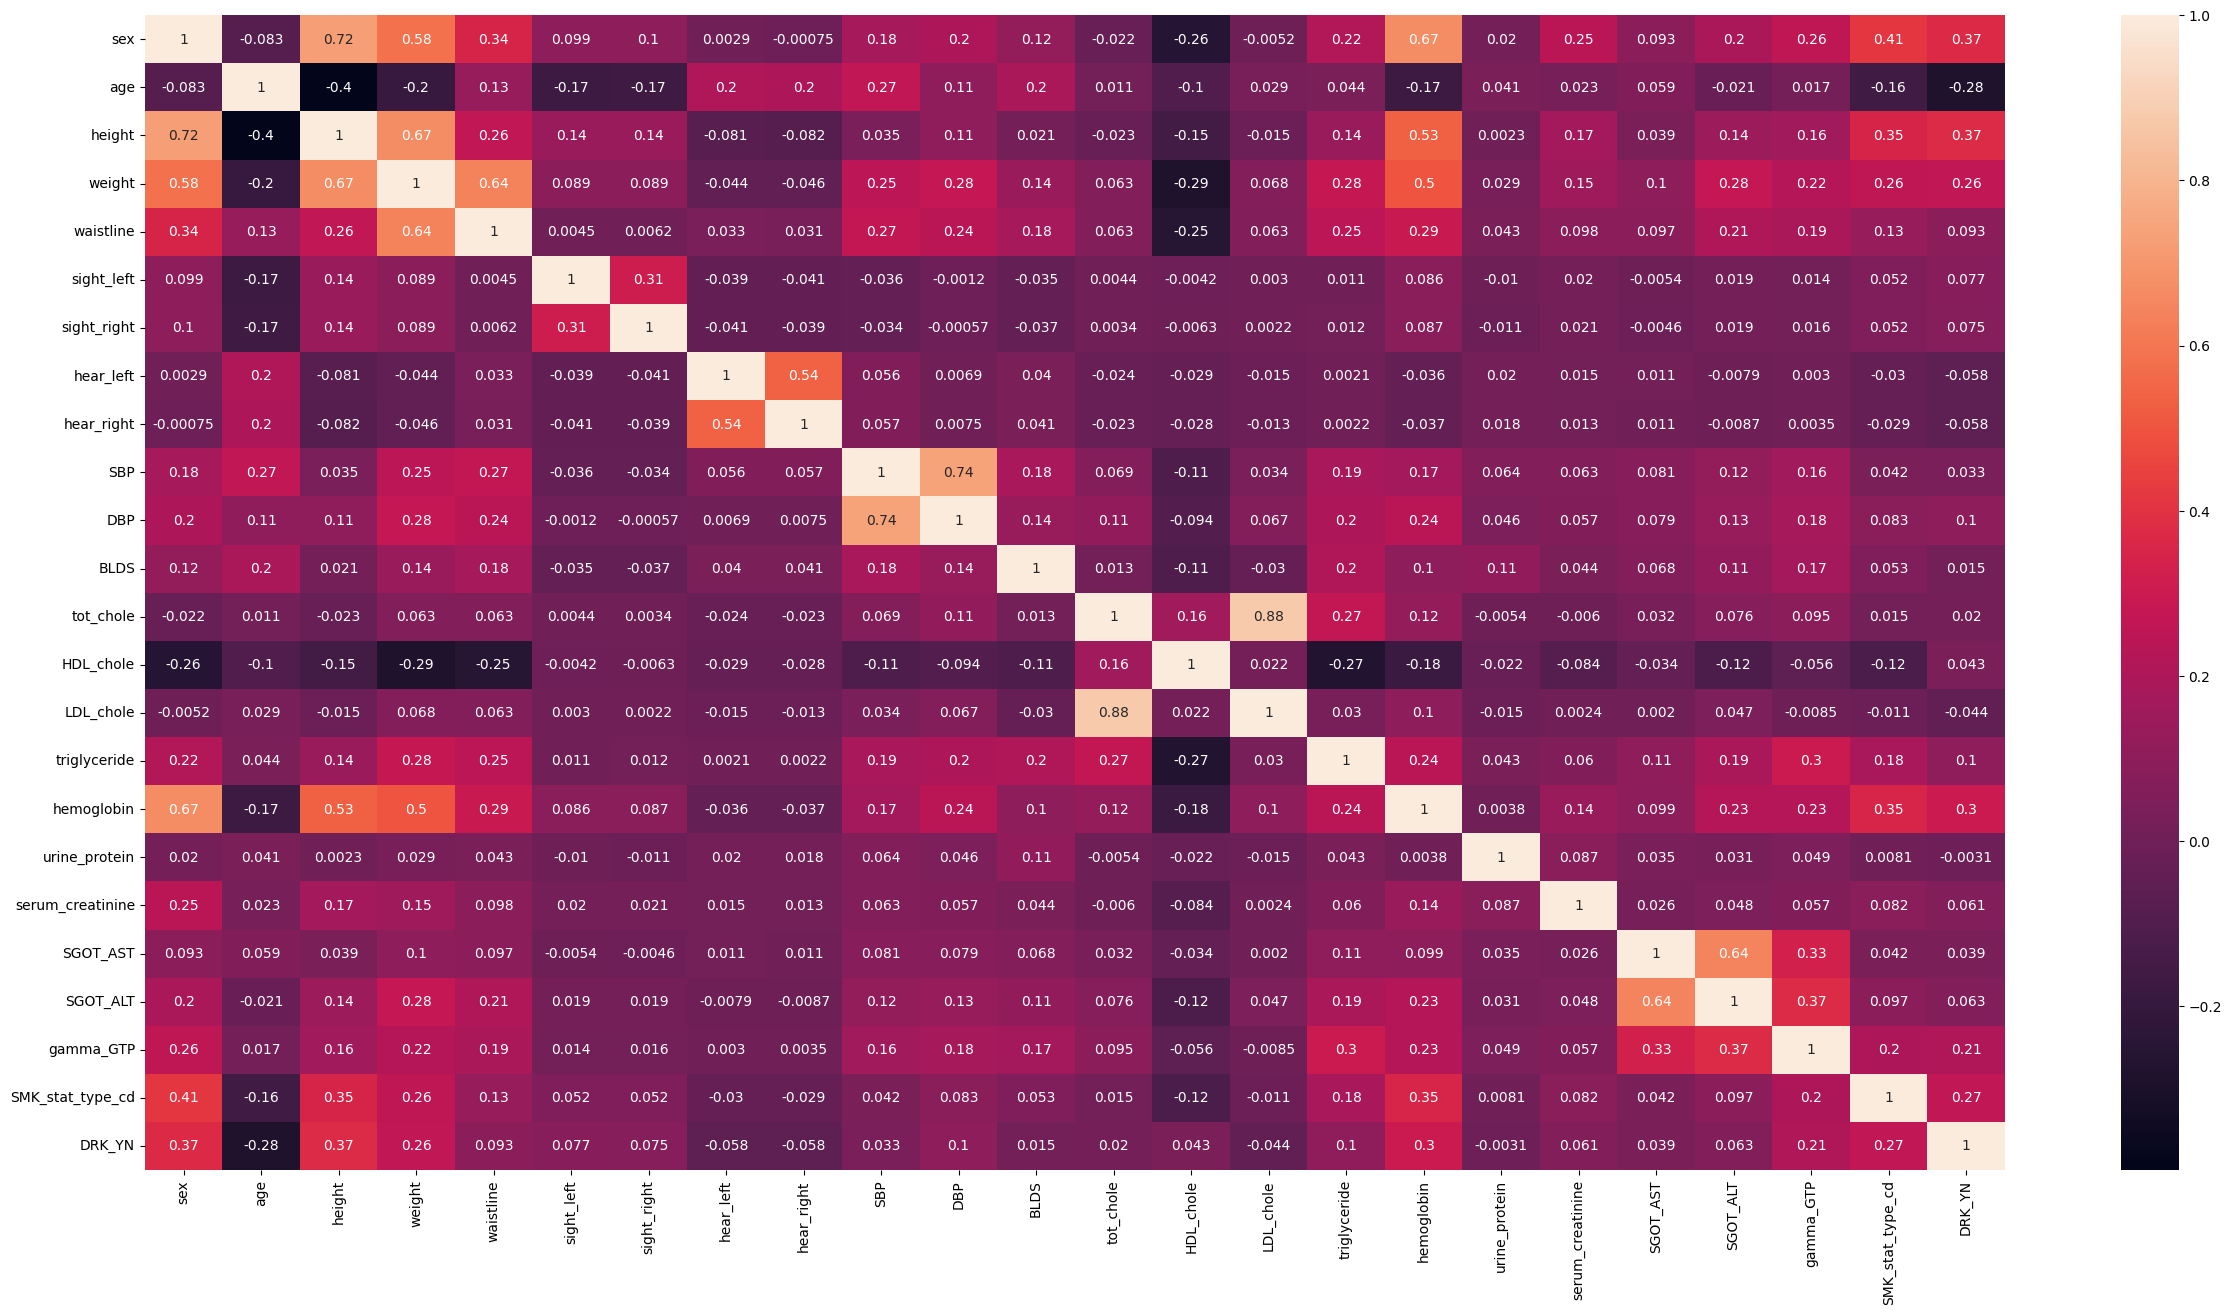

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,0


sex                 0.368726
age                -0.284587
height              0.374566
weight              0.264282
hemoglobin          0.299341
gamma_GTP           0.205094
SMK_stat_type_cd    0.267954
DRK_YN              1.000000
Name: DRK_YN, dtype: float64
['sex', 'age', 'height', 'weight', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']


In [26]:
plt.figure(figsize=(30, 15))  # Ajuste os valores conforme necessário
sns.heatmap(dt2.corr(), annot=True,
        xticklabels=dt2.columns,
        yticklabels=dt2.columns,)

plt.show()
display(dt2.head(5))
corr = dt2.corr()
targetColumnCorr = corr.DRK_YN
goodColumns = targetColumnCorr[(targetColumnCorr >= 0.2) | (targetColumnCorr <= -0.2)]
print(goodColumns)
columns = goodColumns.index.tolist()
print(columns)
##### filtro as colunas que tem uma boa correlacao


dt3 = dt2.copy().get(columns)

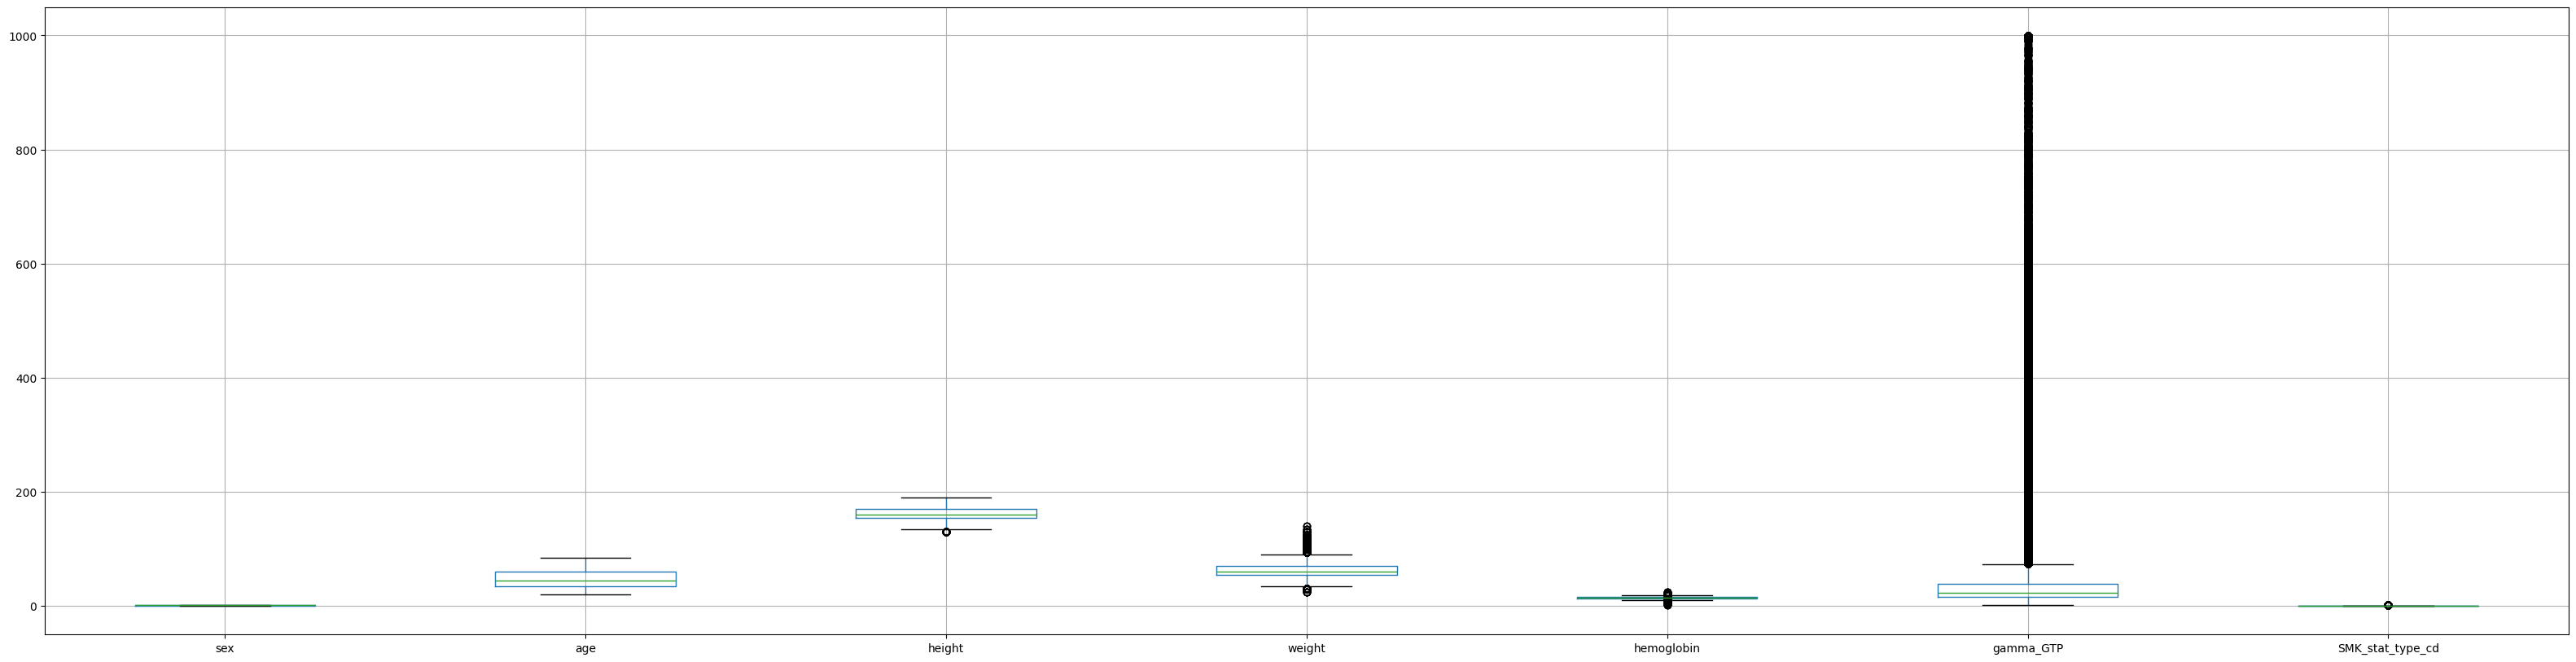

   sex  age  height  weight  hemoglobin  gamma_GTP  SMK_stat_type_cd
0    1   35     170      75        17.1       40.0                 0
1    1   30     180      80        15.8       27.0                 1
2    1   40     165      75        15.8       68.0                 0


In [27]:
dt3X = dt3.copy().drop(columns=['DRK_YN'])
dt3Y = dt3['DRK_YN']

# Armazenar a coluna 'sex' em separado
sex_column = dt3X['sex']

# Excluir a coluna 'sex' antes da normalização
dt3X_no_sex = dt3X.drop(columns=['sex'])

# Aplicar o StandardScaler nas demais colunas
# scaler = StandardScaler()
# dt3X_scaled = pd.DataFrame(scaler.fit_transform(dt3X_no_sex), columns=dt3X_no_sex.columns)

# Concatenar a coluna 'sex' de volta ao DataFrame normalizado
# dt3X_final = pd.concat([dt3X_scaled, sex_column.reset_index(drop=True)], axis=1)

# Visualizar o boxplot após a normalização (exceto 'sex')
dt3X.boxplot(figsize=(40,10))
plt.show()

print(dt3X.head(3))

,sex,age,height,weight,hemoglobin,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170.0,75.0,17.1,40.0,0,1
1,1,30,180.0,80.0,15.8,27.0,1,0
2,1,40,165.0,75.0,15.8,68.0,0,0
3,1,50,175.0,80.0,17.6,18.0,0,0


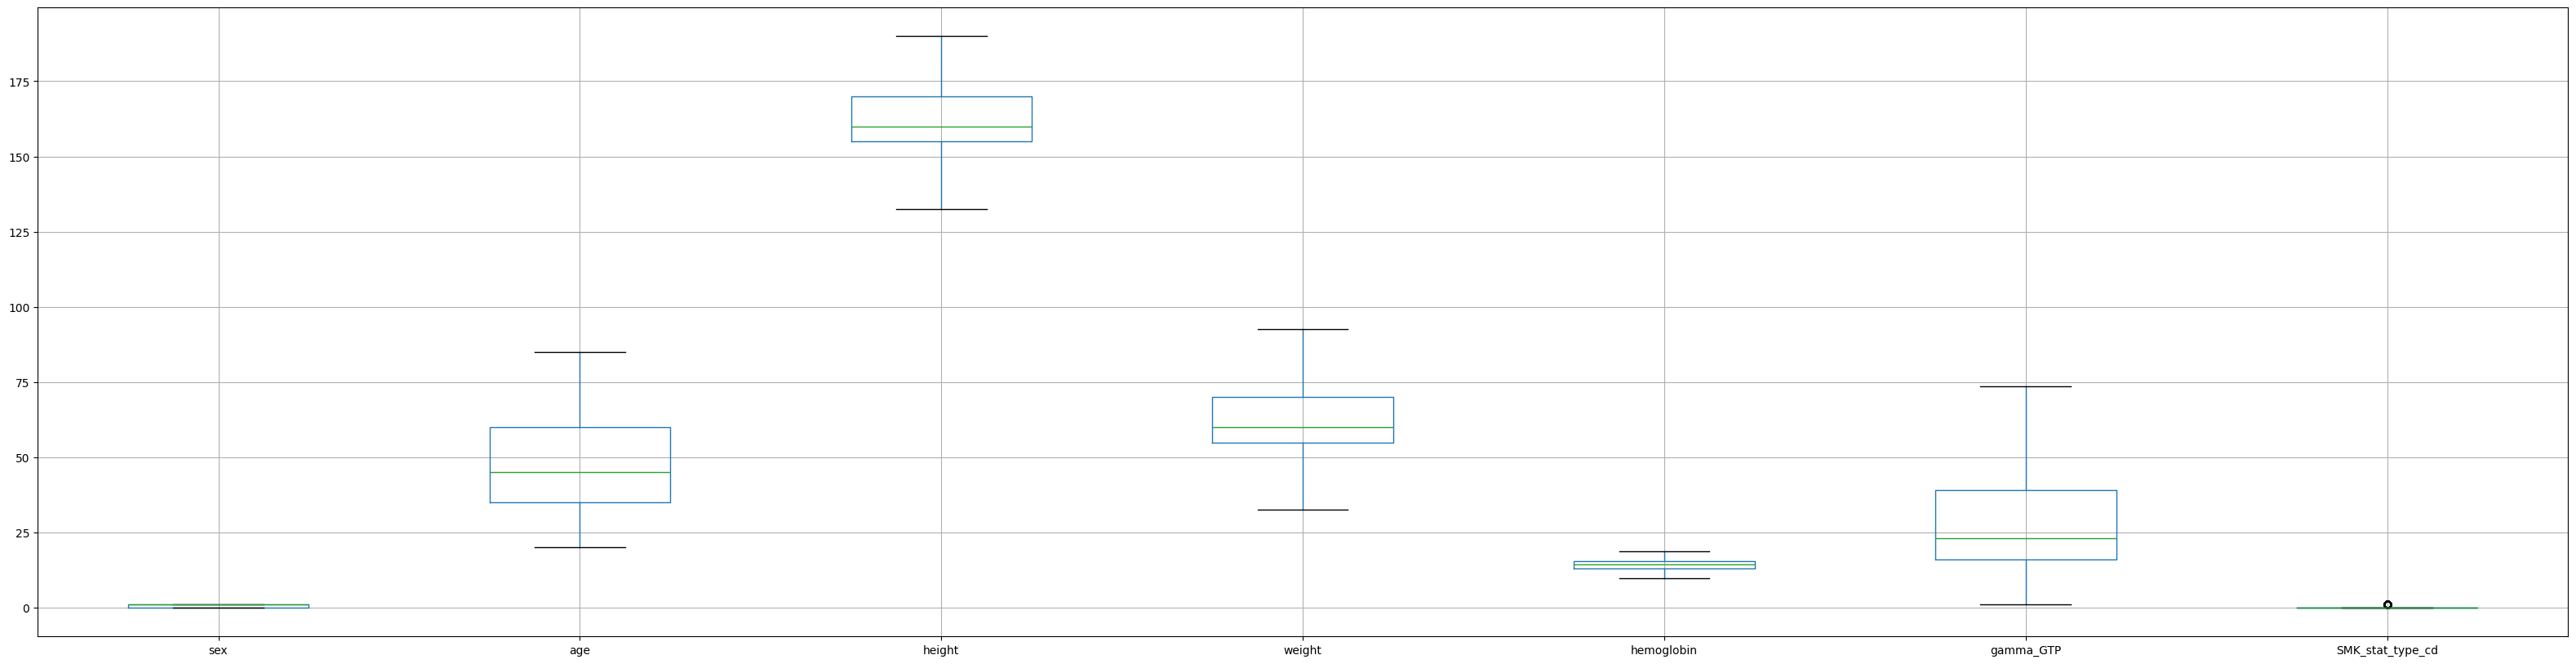

In [28]:
#tratativa do outlier
targetColumns = ['weight', 'hemoglobin', 'gamma_GTP', 'height']
k = 1.5
for col in targetColumns:
    Q1 = dt3X[col].quantile(0.25)
    Q3 = dt3X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    dt3X[col] = dt3X[col].clip(lower=Q1 - k * IQR, upper=Q3 + k * IQR)


dt3X.boxplot(figsize=(40,10))
# dt3X = dt3X.drop(columns=['gamma_GTP'])#muito outlier para pouca correlacao
dt4 = pd.concat([dt3X, dt3Y], axis=1)
display(dt4.head(4))


In [29]:
#talvez aqui seja um boa hora para traçar a correlação
print('dataset antes', len(dt4))
print('dataset dps')
duplicated = dt4.duplicated()
print('linhas duplicadas', len(duplicated[duplicated==True]))
dtf = dt4.drop_duplicates()
print('novo tamanho do datase',len(dtf))
print('diferenca entre classes Y', Counter(dtf['DRK_YN']))
#diferença pequena entre classes nao sera necessario balancear
dtf.head(5)

dataset antes 991346
dataset dps
linhas duplicadas 283557
novo tamanho do datase 707789
diferenca entre classes Y Counter({1: 365105, 0: 342684})


,sex,age,height,weight,hemoglobin,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170.0,75.0,17.1,40.0,0,1
1,1,30,180.0,80.0,15.8,27.0,1,0
2,1,40,165.0,75.0,15.8,68.0,0,0
3,1,50,175.0,80.0,17.6,18.0,0,0
4,1,50,165.0,60.0,13.8,25.0,0,0


In [30]:
scaler = StandardScaler()
dtf_sex = dtf.sex
dtf_smk = dtf.SMK_stat_type_cd
dft_y = dtf['DRK_YN']

dtf_no_bins = dtf.drop(columns=['sex', 'DRK_YN','SMK_stat_type_cd'])

dt3X_scaled = pd.DataFrame(scaler.fit_transform(dtf_no_bins), columns=dtf_no_bins.columns)

finalll = pd.concat([dt3X_scaled,
                     dtf_sex.reset_index(drop=True),
                     dtf_smk.reset_index(drop=True),
                     dft_y.reset_index(drop=True)], axis=1)

finalll.head(5)


,age,height,weight,hemoglobin,gamma_GTP,sex,SMK_stat_type_cd,DRK_YN
0,-0.857197,0.745889,0.876844,1.738860,0.487970,1,0,1
1,-1.195546,1.798940,1.281468,0.920807,-0.217733,1,1,0
2,-0.518848,0.219363,0.876844,0.920807,2.007946,1,0,0
3,0.157849,1.272414,1.281468,2.053496,-0.706297,1,0,0
4,0.157849,0.219363,-0.337028,-0.337736,-0.326303,1,0,0


In [ ]:
dfy = finalll['DRK_YN']
dfx = finalll.drop(columns=['DRK_YN'])

display(dfx.head(5))
display(dfx.isna().sum())
X_train, X_test, y_train, y_test = shuffle(dfx, dfy)

# knnFit(X_train, y_train, X_test, y_test)
bernoullin(X_train, y_train, X_test, y_test)
gaussian(X_train, y_train, X_test, y_test)
redeNeural(X_train, y_train, X_test, y_test)


,age,height,weight,hemoglobin,gamma_GTP,sex,SMK_stat_type_cd
0,-0.857197,0.745889,0.876844,1.738860,0.487970,1,0
1,-1.195546,1.798940,1.281468,0.920807,-0.217733,1,1
2,-0.518848,0.219363,0.876844,0.920807,2.007946,1,0
3,0.157849,1.272414,1.281468,2.053496,-0.706297,1,0
4,0.157849,0.219363,-0.337028,-0.337736,-0.326303,1,0


age                 0
height              0
weight              0
hemoglobin          0
gamma_GTP           0
sex                 0
SMK_stat_type_cd    0
dtype: int64

Acurácia Bernoulli: 65.66440183070672 %
Acurácia gaussian: 66.44917391285733 %
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                80        
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
37938/37938 [==============================] - 36s 939us/step - loss: 0.5947 - accuracy: 0.6774 - val_loss: 0.5937 - val_accuracy: 0.6781
Epoch 2/100
37938/37938 [==========================

In [32]:
# insercaoSequencial(X_train, y_train, X_test, y_test)

In [33]:
# eliminacaoSequencial(X_train, y_train, X_test, y_test)
